# CNN - Cat or Dog

In [13]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

In [14]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))


# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:

# Part 2 - Fitting the CNN to the images
# image augmentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1, # we could add more epochs but it would require much time
                         validation_data = test_set,
                         validation_steps = 2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
8000/8000 [==============================] - 3527s 441ms/step - loss: 0.3281 - acc: 0.8497 - val_loss: 0.6492 - val_acc: 0.7955


In [17]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))

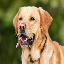

In [18]:
test_image

In [19]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [24]:
test_image = test_image/255.0

In [25]:
test_image.shape

(1, 64, 64, 3)

In [26]:
result = classifier.predict(test_image)

In [27]:
result

array([[ 0.99997318]], dtype=float32)

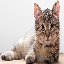

In [28]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image

In [29]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image/255.0
result = classifier.predict(test_image)
result

array([[ 0.03955013]], dtype=float32)